# Guided Project: Clean And Analyze Employee Exit Surveys

In this project, our goal is to analyse the data from two exit surveys and determine the impact of longevity and age on job satisfaction at the Departement of Education, Training and Employment (DETE), and the Technical and Further Education (TAFE) in Queensland, Australia.

In [44]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
# read the csv files
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [46]:
# take a look at the DETE survey
dete_survey.info()
dete_survey['SeparationType'].value_counts()
dete_survey['Cease Date'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
07/2014         2
08/2012         2
04/2014         2
02/2014         2
09/2014         1
07/2012         1
07/2006         1
09/2010         1
2010            1
11/2012         1
2014            1
Name: Cease Date, dtype: int64

In [47]:
# take a look at the TAFE survey
tafe_survey.info()
tafe_survey['Reason for ceasing employment'].value_counts()
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

### Observations

It looks like we have a lot of work to do, especially with the TAFE data. The column names are long and unevenly formatted. There are many missing values in both data sets. We also see that `dete_survey['Cease Date']`'s missing values read `Not stated` instead of `Nan`.

# Identify Missing Values and Drop Unnecessary Columns

In [48]:
# read DETE data again, but identifying missing values
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [49]:
# drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [50]:
dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

# Clean Column Names

In [51]:
# clean DETE column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [52]:
#clean TAFE column names
tafe_dict = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_dict)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

With lowercase and snake_case, the columns names are much easier to read.

# Filter the data

In [53]:
# take a look at separation types in both data sets
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [54]:
# keep only the rows containing 'Resignation'
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

# Verify the data

In [55]:
# take a look at the DETE's cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [56]:
# let's keep full years only
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [57]:
# take a look at the DETE's dete_start_date column
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [58]:
# take a look at the TAFE's cease_date column
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

All starting and cease dates look within reason.

# Create a new column

In [59]:
# take a look at TAFE's institute_service
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [60]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

Now, the years in service are comparable between the two data sets.

# Identify Dissatisfied Employees

In [61]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True
    
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [62]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1,skipna=False)

In [63]:
dete_resignations['dissatisfied'] = dete_resignations[['dissatisfaction_with_the_department','job_dissatisfaction']].any(axis=1,skipna=False)

In [64]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

We now have, in both dataframes, a `dissatisfied` that indicates if the employee was dissatisfied.

# Combine the data

In [65]:
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [66]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [67]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [68]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,False,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


We concatenated the two dataframes and dropped any columns with less that 500 non-null values.

# Clean the Service column

In [69]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


In [70]:
# extract the first number of each institute_service value
years_str = combined_updated['institute_service'].astype('str')
years = years_str.str.extract('(\d+)',expand=False).astype('float')
years.value_counts(dropna=False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [71]:
# apply a function to replace the number of years with career stage
def career_stage(year):
    if pd.isnull(year):
        return np.nan
    elif year < 3:
        return 'New'
    elif 3 <= year <= 6:
        return 'Experienced'
    elif 6 < year <= 10:
        return 'Established'
    elif year > 10:
        return 'Veteran'
    
combined_updated['service_cat'] = years.apply(career_stage)

In [72]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

It's now much easier to analyse the data from both datasets based on the career stage.

# Perform Initial Analysis

In [73]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    493
True     150
NaN        8
Name: dissatisfied, dtype: int64

In [74]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [75]:
dissatisfied_pivot = combined_updated.pivot_table(index='service_cat',values='dissatisfied')

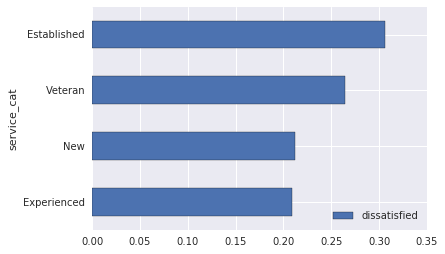

In [82]:
dissatisfied_pivot.sort_values('dissatisfied').plot(kind='barh')

It looks like employees with more advanced career stages are more inclined to resign because of their dissatisfaction.

# Second Analysis : Age groups

In [85]:
# take a look at the age column
combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

Let's create a new column that will map out the age column according to these age groups :
- `25 or younger`
- `26 to 35`
- `36 to 45`
- `46 to 55`
- `56 or older`

In [87]:
# extract the first number of each age
age_str = combined_updated['age'].astype('str')
age_float = age_str.str.extract('(\d+)',expand=False).astype('float')
age_float.value_counts(dropna=False).sort_index()

 20.0    10
 21.0    62
 26.0    67
 31.0    61
 36.0    73
 41.0    93
 46.0    81
 51.0    71
 56.0    55
 61.0    23
NaN      55
Name: age, dtype: int64

In [88]:
# apply a function to map them oup into age groups
def age_groups(age):
    if pd.isnull(age):
        return np.nan
    elif age < 25:
        return '25 or younger'
    elif 25 < age < 35:
        return '26 to 35'
    elif 35 < age < 45:
        return '36 to 45'
    elif 45 < age < 55:
        return '46 to 55'
    elif age > 55:
        return '56 or older'

combined_updated['age_group'] = age_float.apply(age_groups)

In [93]:
combined_updated['age_group'].value_counts().sort_index()

25 or younger     72
26 to 35         128
36 to 45         166
46 to 55         152
56 or older       78
Name: age_group, dtype: int64

In [94]:
age_pivot = combined_updated.pivot_table(index='age_group',values='dissatisfied')

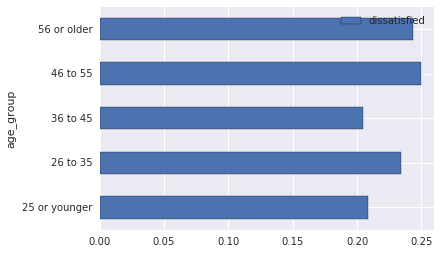

In [98]:
age_pivot.sort_index().plot(kind='barh', xlim=(0,.26))

It looks like the two oldest age groups tend to resign more because of their dissatisfaction.